In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualização das Relações entre os Dados

In [3]:
df = pd.read_csv("TABELAFINAL2.csv")
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,GENDER,AGE,EMERGENCY_TIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,17050,112755,2859,NaN,M,0,20,UNKNOWN/NOT SPECIFIED,EMERGENCY,PHYS REFERRAL/NORMAL DELI,20.0276
1,896,130347,4280,"966,3893,9672,9604",F,0,24,BLACK/AFRICAN AMERICAN,NEWBORN,HMO REFERRAL/SICK,24.0684
2,12971,186975,5849,"9604,9904,9671",M,0,4,WHITE,NEWBORN,HMO REFERRAL/SICK,4.7113
3,10925,132569,51881,"9671,9604",M,19,2,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0333
4,47757,146207,2859,3893,M,19,33,HISPANIC/LATINO - DOMINICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.7694
...,...,...,...,...,...,...,...,...,...,...,...
222602,17122,180135,4280,"3891,966,9604,9672",F,97,8,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,4.3681
222603,7936,102376,25000,NaN,M,98,5,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.3642
222604,21350,182608,2724,3893,M,98,7,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.3311
222605,16275,121843,42731,"966,9672",F,99,37,OTHER,EMERGENCY,CLINIC REFERRAL/PREMATURE,3.7751


#### Visualização dos valores nulos para todas as colunas do dataset

In [3]:
count = df.isnull().sum()
count

SUBJECT_ID                0
HADM_ID                   0
DIAGNOSES                 0
PROCEDURES            71339
GENDER                    0
AGE                       0
EMERGENCY_TIME            0
ETHNICITY                 0
ADMISSION_TYPE            0
ADMISSION_LOCATION        0
LOS                      11
dtype: int64

#### Alteração do procedimento para 0 quando este tem valor nulo:

In [22]:
df['PROCEDURES'] = df['PROCEDURES'].fillna('0')

### Relação entre a Diagnoses e a Gender

Podemos visualizar que certas doenças têm uma maior tendência para pacientes do sexo masculino como é o caso da doença 41401 e outras para pacientes do sexo feminino como é o caso da doença 5990.

<Figure size 1000x600 with 0 Axes>

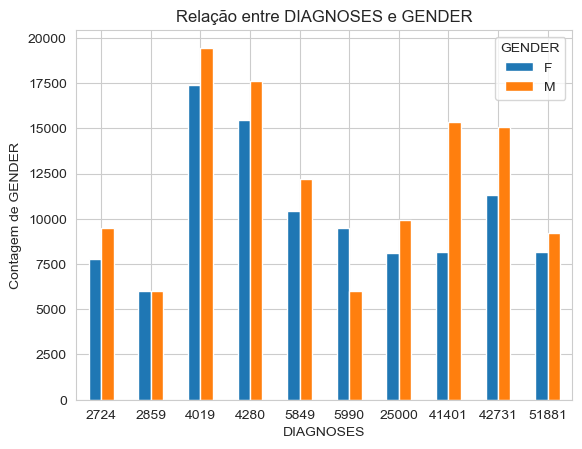

In [23]:
diagnosis_gender_count = df.groupby(['DIAGNOSES', 'GENDER']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
diagnosis_gender_count.plot(kind='bar', stacked=False)

plt.title('Relação entre DIAGNOSES e GENDER')
plt.xlabel('DIAGNOSES')
plt.ylabel('Contagem de GENDER')
plt.xticks(rotation=0)
plt.legend(title='GENDER')

plt.show()

### Relação entre o Gender e a LOS

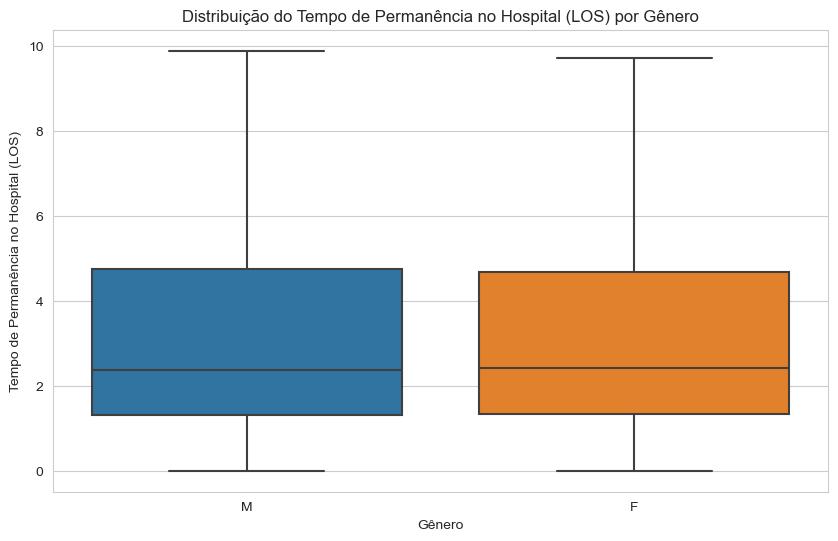

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GENDER', y='LOS', data=df, showfliers=False)

plt.title('Distribuição do Tempo de Permanência no Hospital (LOS) por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Tempo de Permanência no Hospital (LOS)')

plt.show()

### Relação entre as Diagnoses e a Age

Podemos visualizar que existem doenças com um grande volume de incidêcia entre os 65 e os 90 como é o caso da doença 42731. Além disso, algumas das doenças só afetam pacientes com mais de 18 anos.

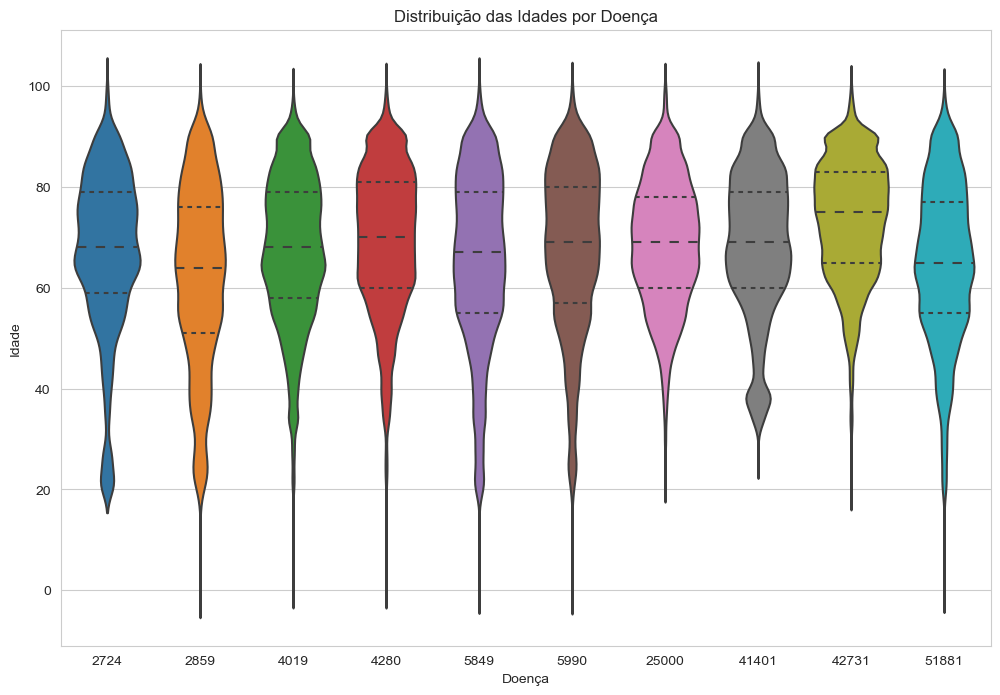

In [8]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='DIAGNOSES', y='AGE', data=df, inner='quartile')

plt.title('Distribuição das Idades por Doença')
plt.xlabel('Doença')
plt.ylabel('Idade')

plt.show()

### Relação entre as Diagnoses e as Procedures

Podemos visualizar que certas doenças têm mais tendência para receber certos procedimentos. 

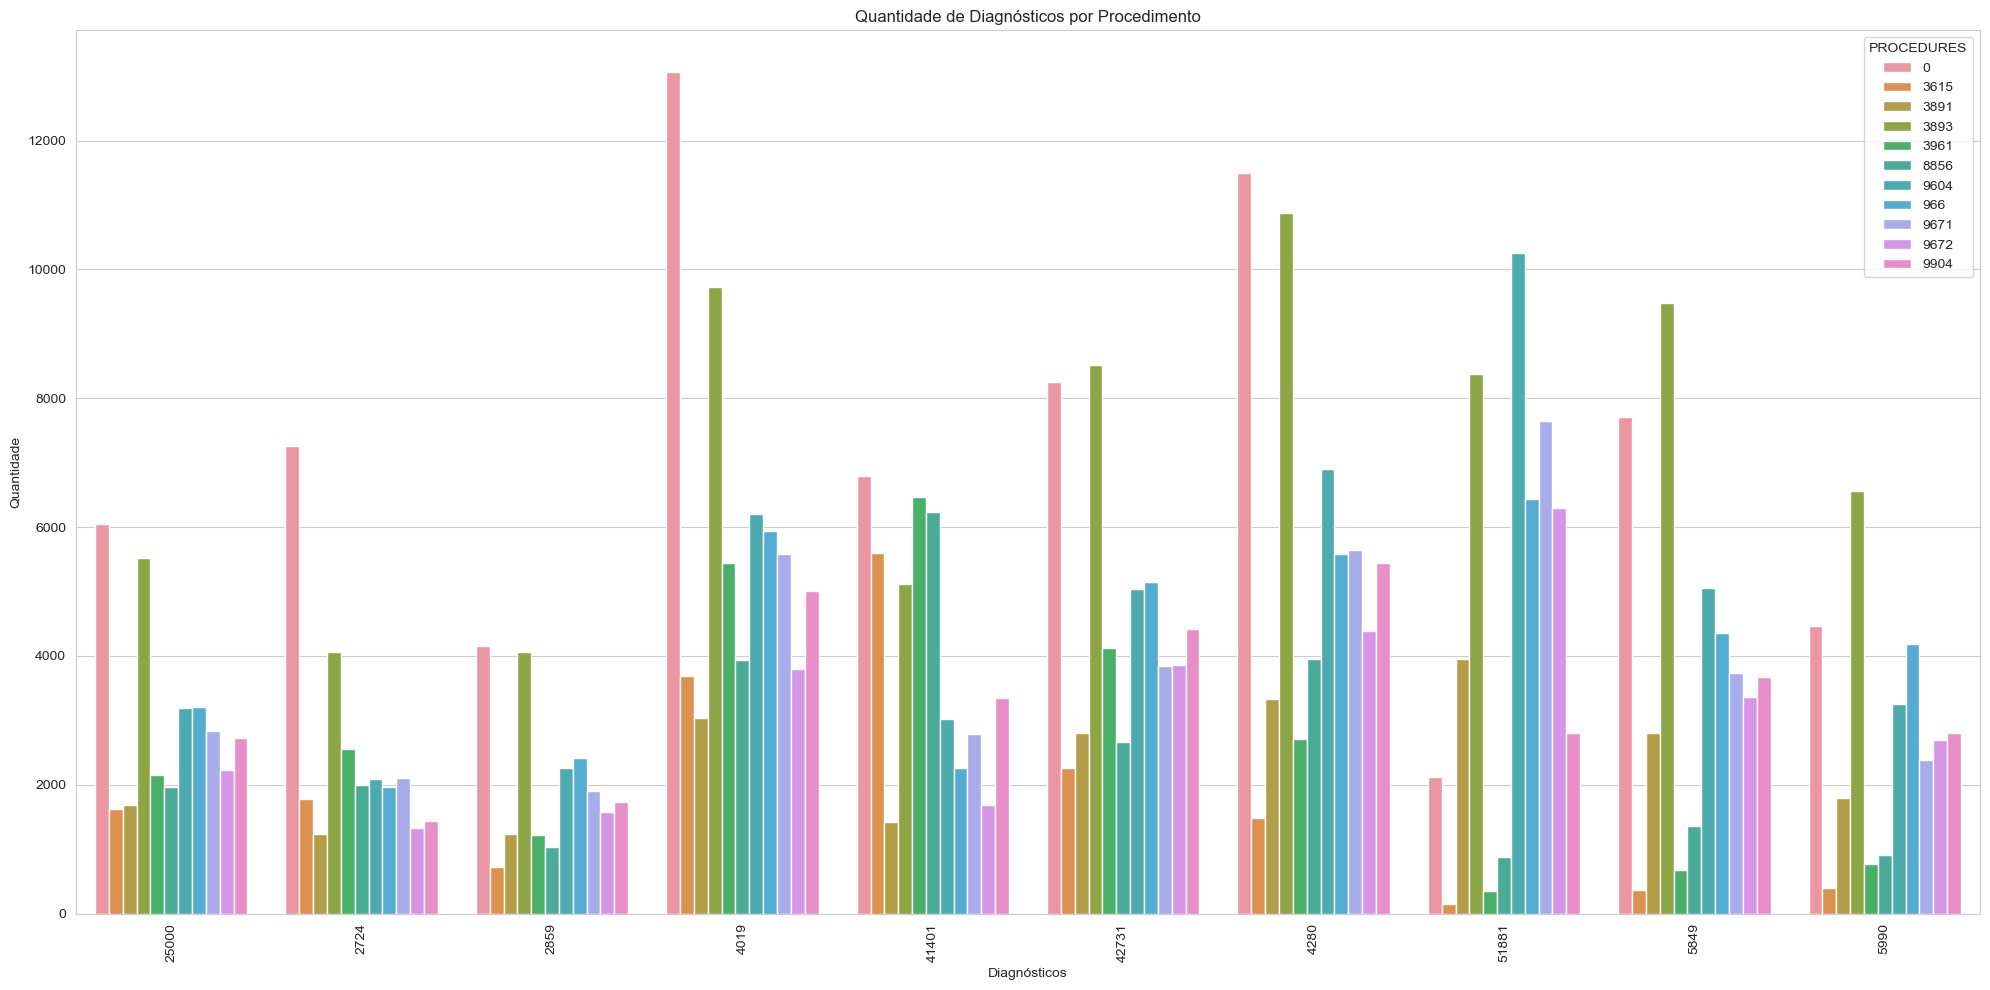

In [24]:
# Dividir a coluna 'PROCEDURES' em várias linhas
df_procedures = df.assign(PROCEDURES=df['PROCEDURES'].str.split(',')).explode('PROCEDURES')

# Remover espaços em branco ao redor dos procedimentos
df_procedures['PROCEDURES'] = df_procedures['PROCEDURES'].str.strip()

# Garantir que 'PROCEDURES' e 'DIAGNOSES' sejam tratados como strings
df_procedures['PROCEDURES'] = df_procedures['PROCEDURES'].astype(str)
df_procedures['DIAGNOSES'] = df_procedures['DIAGNOSES'].astype(str)

# Criar um DataFrame de contagem da associação entre PROCEDURES e DIAGNOSES
procedures_diagnoses_counts = df_procedures.groupby(['PROCEDURES', 'DIAGNOSES']).size().reset_index(name='count')

plt.figure(figsize=(20, 10))
sns.barplot(x='DIAGNOSES', y='count', hue='PROCEDURES', data=procedures_diagnoses_counts)

plt.title('Quantidade de Diagnósticos por Procedimento')
plt.xlabel('Diagnósticos')
plt.ylabel('Quantidade')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Relação entre a Admission_type e a LOS

Podemos visualizar que recém-nascidos têm um tempo de permanência bastante mais alto do que as restantes admissões. Além disso, também as urgências têm um ligeiro tempo de permanência maior que as restantes duas admissões.

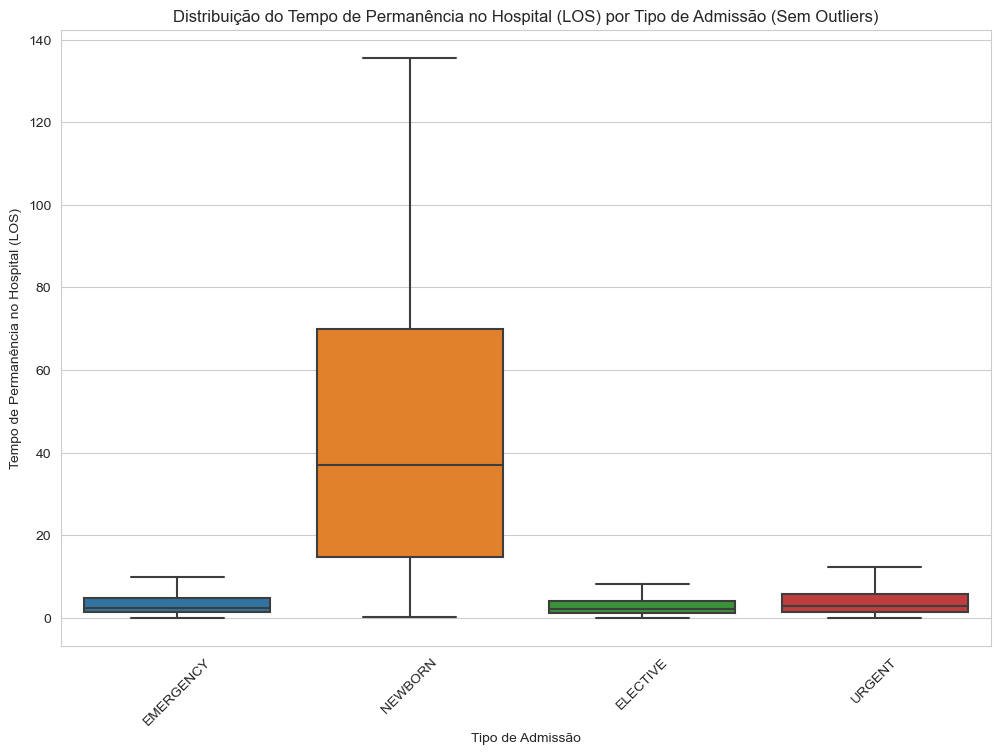

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ADMISSION_TYPE', y='LOS', data=df, showfliers=False)

plt.title('Distribuição do Tempo de Permanência no Hospital (LOS) por Tipo de Admissão (Sem Outliers)')
plt.xlabel('Tipo de Admissão')
plt.ylabel('Tempo de Permanência no Hospital (LOS)')
plt.xticks(rotation=45)

plt.show()

### Relação entre a Admission_Location e a LOS

Podemos visualizar que a localização dos pacientes antes da sua admissão no hospital revela algumas tendências relativamente ao tempo que estiveram no hospital.

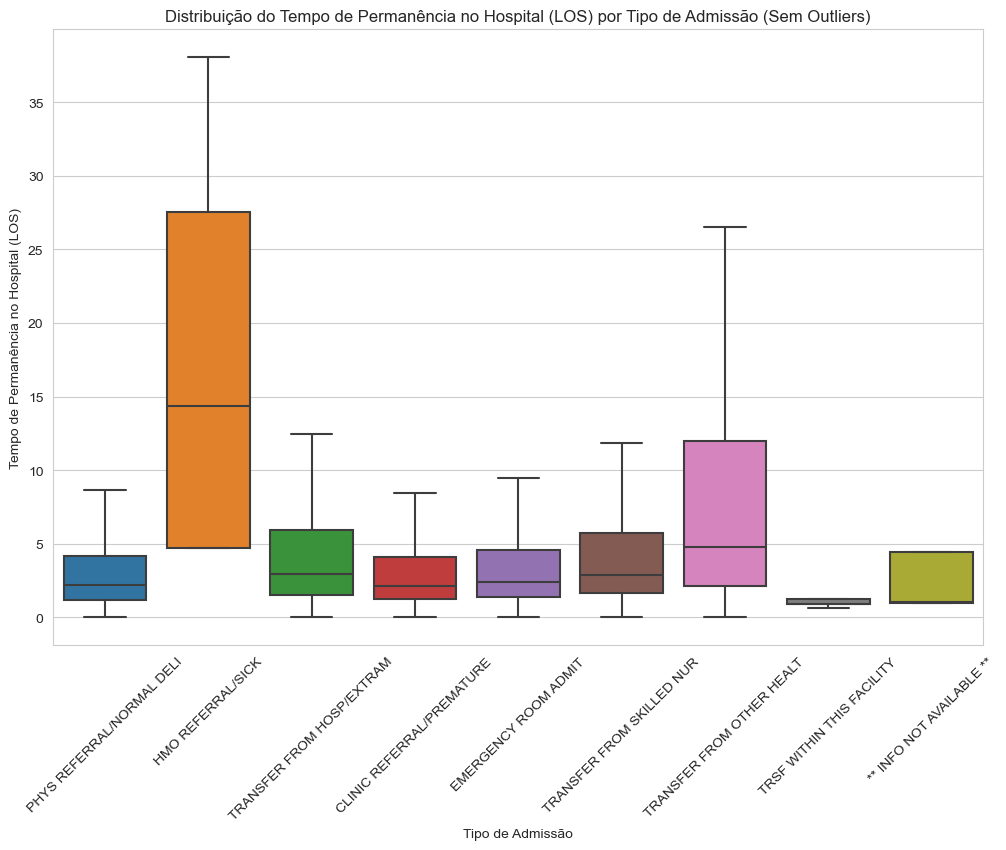

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ADMISSION_LOCATION', y='LOS', data=df, showfliers=False)

plt.title('Distribuição do Tempo de Permanência no Hospital (LOS) por Tipo de Admissão (Sem Outliers)')
plt.xlabel('Tipo de Admissão')
plt.ylabel('Tempo de Permanência no Hospital (LOS)')
plt.xticks(rotation=45)

plt.show()

### Relação entre a Age e a LOS

###### Para facilitar a visualização e mais à frente a classificação do modelo, agrupamos as idades de 10 em 10 anos.
Visualiza-se claramente um maior tempo de permanência no hospital em pacientes de idades dos 0 aos 9 anos, e um menor tempo de permanência nos pacientes dos 20 aos 29 anos.

/var/folders/ly/8v1_9l291tjb7_s7zctdgw780000gn/T/ipykernel_978/159868120.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_los = df.groupby('AGE_GROUP')['LOS'].mean().reset_index()
/Users/joao/opt/anaconda3/envs/LabIACD/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


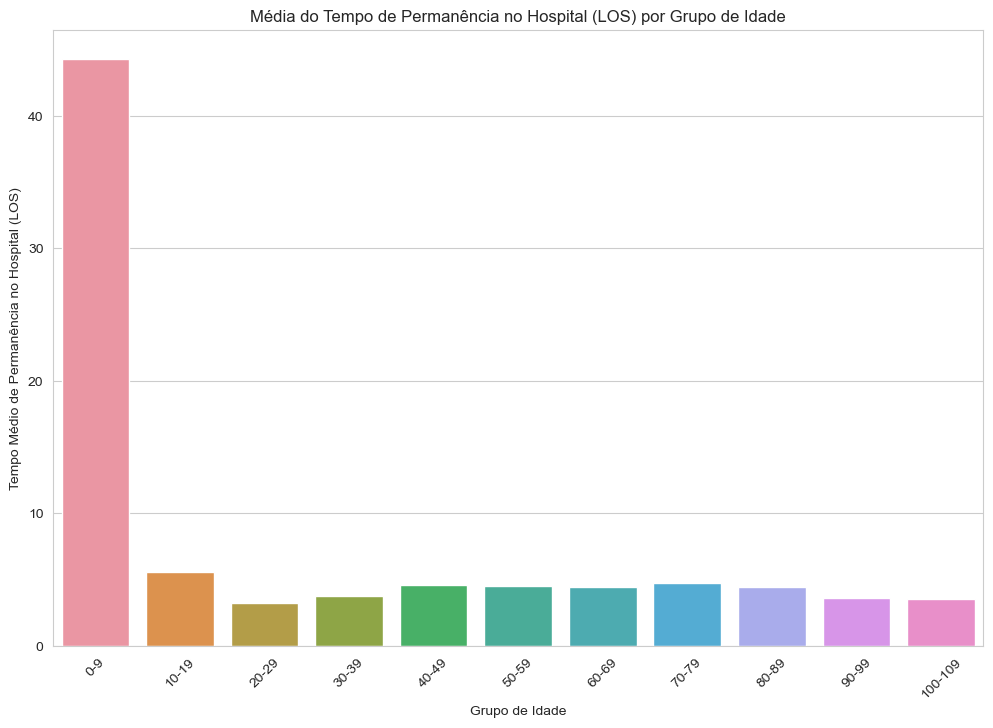

In [18]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

age_group_avg_los = df.groupby('AGE_GROUP')['LOS'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='AGE_GROUP', y='LOS', data=age_group_avg_los)

plt.title('Média do Tempo de Permanência no Hospital (LOS) por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Tempo Médio de Permanência no Hospital (LOS)')
plt.xticks(rotation=45)

plt.show()

### Relação entre a Age e a Diagnoses

Podemos visualizar uma alta tendência, em geral, das doenças em idades mais altas

/var/folders/ly/8v1_9l291tjb7_s7zctdgw780000gn/T/ipykernel_978/2019633540.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diagnosis_counts = df.groupby(['AGE_GROUP', 'DIAGNOSES']).size().reset_index(name='counts')


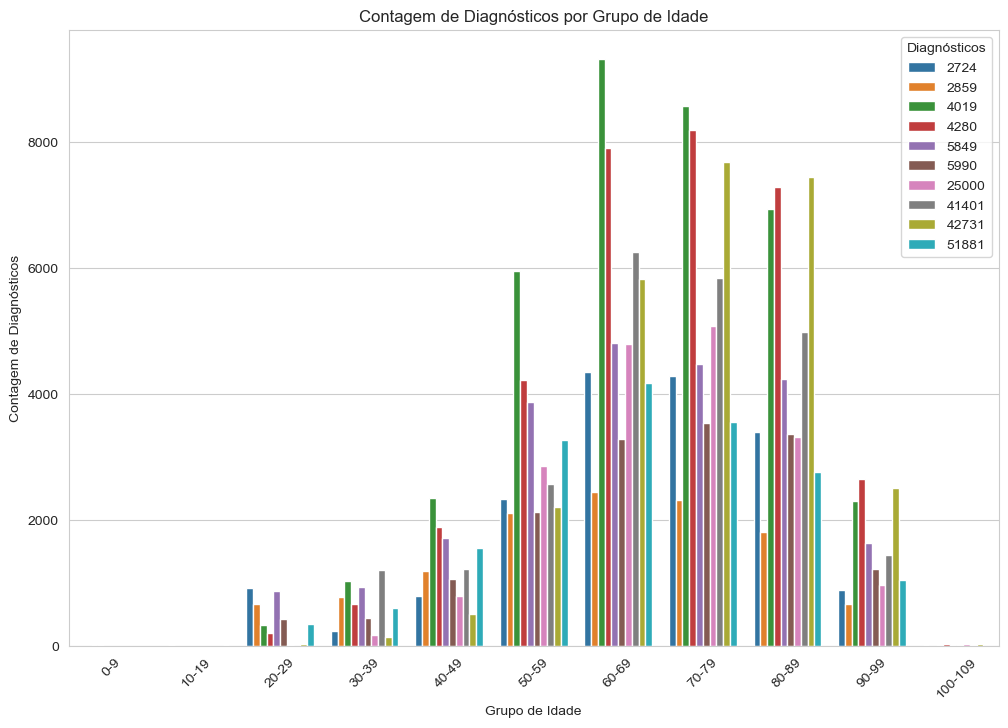

In [25]:
# Definindo os intervalos de idade
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109']

# Criando uma nova coluna com os grupos de idade
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Calculando a contagem de diagnósticos para cada grupo de idade
age_diagnosis_counts = df.groupby(['AGE_GROUP', 'DIAGNOSES']).size().reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='AGE_GROUP', y='counts', hue='DIAGNOSES', data=age_diagnosis_counts.astype({'AGE_GROUP': 'str', 'DIAGNOSES': 'str'}))

plt.title('Contagem de Diagnósticos por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Contagem de Diagnósticos')
plt.xticks(rotation=45)
plt.legend(title='Diagnósticos')

plt.show()

###### Graficamente é impossivel visualizar os dados das idades 0-9 e 10-19 devido à pouca quantidade de dados para essas idades.

In [24]:
# Filtrar o dataset para obter apenas as entradas com idade inferior a 20
df_menos_de_20 = df[df['AGE'] < 20]

# Exibir os diagnósticos associados a essas entradas
diagnosticos_menos_de_20 = df_menos_de_20['DIAGNOSES']

# Imprimir os diagnósticos
diagnosticos_menos_de_20

0          2859
1          4280
2          5849
3         51881
4          2859
          ...  
209079    51881
209080     4280
213595     2859
213596     2859
218079     4280
Name: DIAGNOSES, Length: 130, dtype: int64

### Relação entre a Ethnicity e a LOS

Agrupamos as etnias em diferentes conjuntos para facilitar a visualização e mais a frente a classificação do modelo.

In [5]:
# Criar um dicionário para mapear as etnias 
categorias_etnias = {
    'WHITE': 'Branco',
    'BLACK/AFRICAN AMERICAN': 'Negro',
    'OTHER': 'Outro',
    'UNKNOWN/NOT SPECIFIED': 'Desconhecido/Não Especificado',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispano',
    'HISPANIC OR LATINO': 'Hispano',
    'ASIAN - FILIPINO': 'Asiático',
    'WHITE - BRAZILIAN': 'Branco',
    'ASIAN': 'Asiático',
    'WHITE - OTHER EUROPEAN': 'Branco',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Ilhas do Pacífico',
    'MULTI RACE ETHNICITY': 'Multiétnico',
    'UNABLE TO OBTAIN': 'Não foi possível obter',
    'BLACK/AFRICAN': 'Negro',
    'HISPANIC/LATINO - SALVADORAN': 'Hispano',
    'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)': 'Hispano',
    'BLACK/HAITIAN': 'Negro',
    'WHITE - RUSSIAN': 'Branco',
    'ASIAN - CHINESE': 'Asiático',
    'PORTUGUESE': 'Português',
    'PATIENT DECLINED TO ANSWER': 'Paciente recusou responder',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispano',
    'BLACK/CAPE VERDEAN': 'Negro',
    'HISPANIC/LATINO - DOMINICAN': 'Hispano',
    'ASIAN - ASIAN INDIAN': 'Asiático',
    'HISPANIC/LATINO - CUBAN': 'Hispano',
    'ASIAN - VIETNAMESE': 'Asiático',
    'HISPANIC/LATINO - MEXICAN': 'Hispano',
    'ASIAN - OTHER': 'Asiático',
    'MIDDLE EASTERN': 'Oriente Médio',
    'ASIAN - KOREAN': 'Asiático',
    'ASIAN - CAMBODIAN': 'Asiático',
    'WHITE - EASTERN EUROPEAN': 'Branco',
    'SOUTH AMERICAN': 'Sul Americano',
    'AMERICAN INDIAN/ALASKA NATIVE': 'Índio Americano/Nativo do Alasca',
    'HISPANIC/LATINO - COLOMBIAN': 'Hispano',
    'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'Tribos Reconhecidas Federalmente de Índios Americanos/Nativos do Alasca',
    'CARIBBEAN ISLAND': 'Ilha do Caribe',
    'ASIAN - THAI': 'Asiático',
    'ASIAN - JAPANESE': 'Asiático',
    'HISPANIC/LATINO - HONDURAN': 'Hispano'
}

df['CATEGORIA_ETNIA'] = df['ETHNICITY'].map(categorias_etnias)

# Exibir contagem de cada categoria de etnia
contagem_categorias_etnias = df['CATEGORIA_ETNIA'].value_counts()

# Imprimir contagem de cada categoria de etnia
contagem_categorias_etnias

CATEGORIA_ETNIA
Branco                                                                     153660
Negro                                                                       37055
Desconhecido/Não Especificado                                               10665
Hispano                                                                      7889
Asiático                                                                     4425
Outro                                                                        4249
Não foi possível obter                                                       2253
Paciente recusou responder                                                   1274
Português                                                                     449
Multiétnico                                                                   301
Oriente Médio                                                                 250
Índio Americano/Nativo do Alasca                                               80


In [6]:
df['CATEGORIA_ETNIA'] = df['ETHNICITY'].map(categorias_etnias)

###### Reparamos algumas tendências relativamente ao tempo que o paciente esteve no hospital relativamente à sua etnia. 
Como é o caso das Tribos Reconhecidas Federalmente de Índios Americanos/Nativos do Alasca que mostram uma tendência bastante maior do que qualquer outra etnia relativamente ao tempo que se mantêm no hospital.

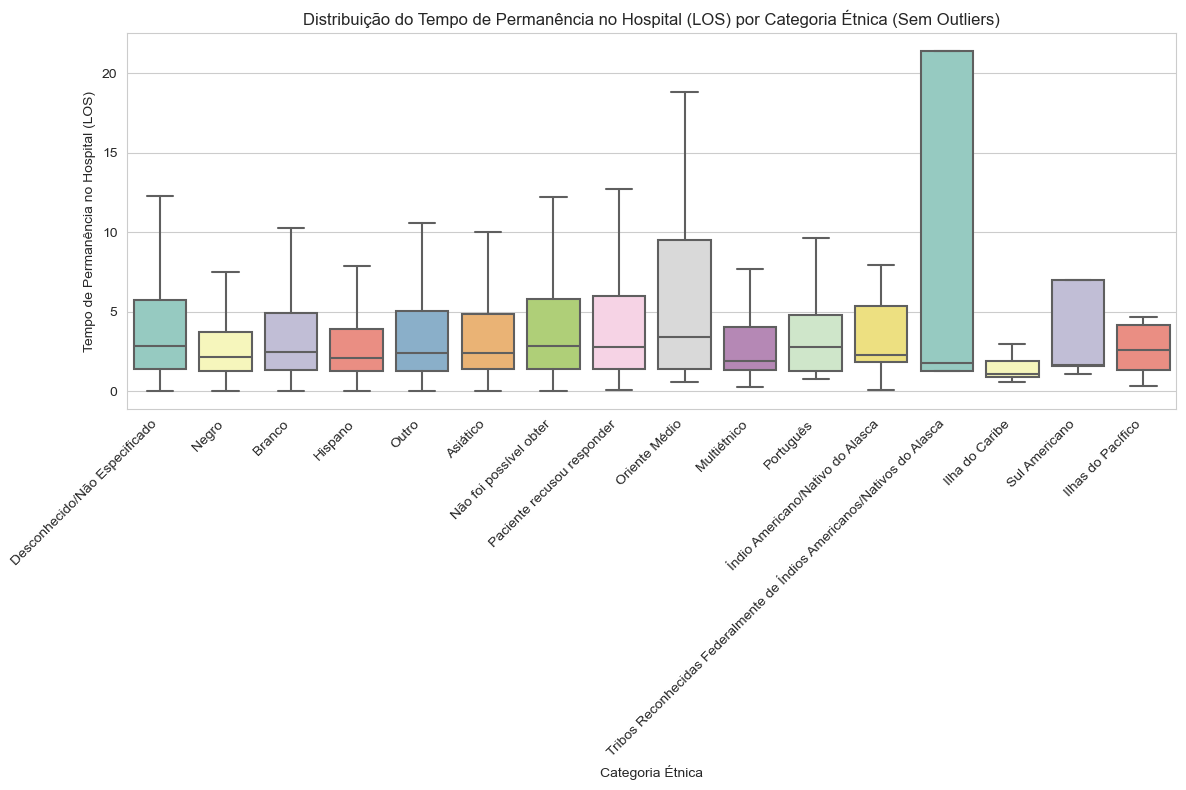

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CATEGORIA_ETNIA', y='LOS', data=df, palette="Set3", showfliers=False)

plt.title('Distribuição do Tempo de Permanência no Hospital (LOS) por Categoria Étnica (Sem Outliers)')
plt.xlabel('Categoria Étnica')
plt.ylabel('Tempo de Permanência no Hospital (LOS)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()